- It is used to scale the feature to median and quantile
- Subtracts values from the median and divide them by difference of 75% and 25 IQR

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler


In [2]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/titanic_train.csv", usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df.Age.fillna(df.Age.median(), inplace = True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [4]:
min_max = RobustScaler()
scaled_df = min_max.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

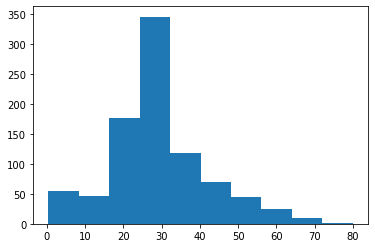

In [6]:
plt.hist(df['Age'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.12153846, -1.50938462, -0.89723077, -0.28507692,  0.32707692,
         0.93923077,  1.55138462,  2.16353846,  2.77569231,  3.38784615,
         4.        ]),
 <a list of 10 Patch objects>)

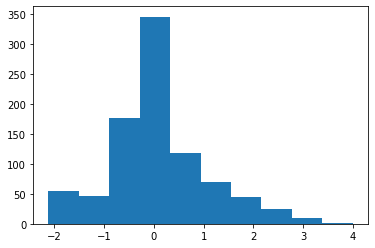

In [7]:
plt.hist(scaled_df['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  1.59286952,  3.81174382,  6.03061811,  8.24949241,
        10.46836671, 12.68724101, 14.90611531, 17.12498961, 19.3438639 ,
        21.5627382 ]),
 <a list of 10 Patch objects>)

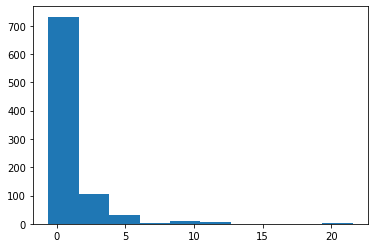

In [8]:
plt.hist(scaled_df['Fare'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffaa2549da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffaa24284e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffaa2549c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffaa2428b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffaa2428eb8>],
 'means': []}

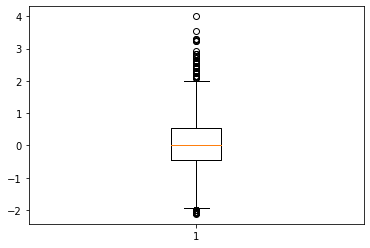

In [14]:
plt.boxplot(scaled_df['Age'])